# 0. Simulate phone dataset
## A

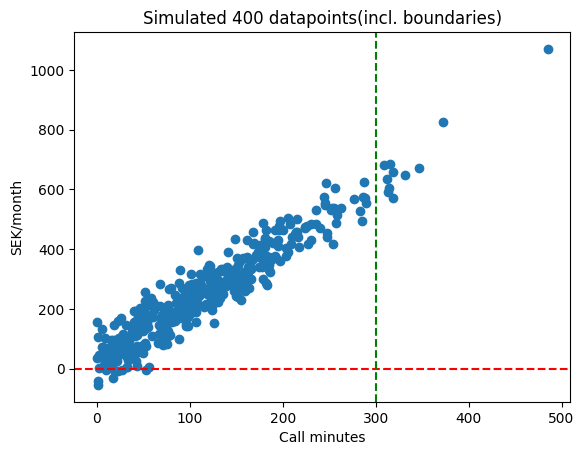

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

np.random.seed(42)
x = np.random.normal(100, 100, size=400) # normalfördelning

x = np.abs(x) # tar bort negativa nummer (absolutvärde)

epsilon = np.random.normal(0, 50, size=400)

y = 2*x + 25 + epsilon

plt.scatter(x, y)
plt.title("Simulated 400 datapoints(incl. boundaries)")
plt.xlabel("Call minutes")
plt.ylabel("SEK/month")
plt.axhline(y=0, color="red", linestyle="--")
plt.axvline(x=300, color="green", linestyle="--")

# B

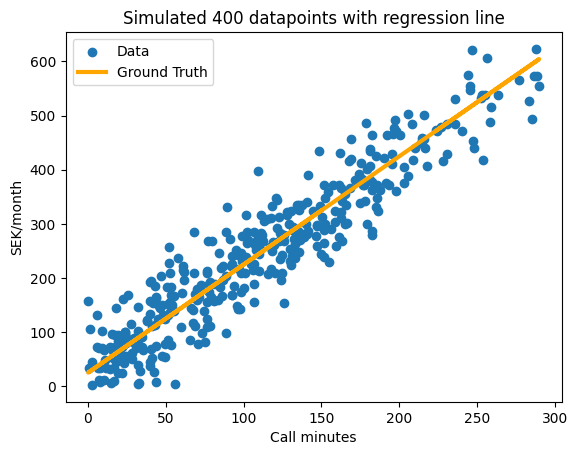

In [124]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.random.normal(100, 100, size=400) # normalfördelning

x = np.abs(x) # tar bort negativa nummer (absolutvärde)

epsilon = np.random.normal(0, 50, size=400)

y = 2*x + 25 + epsilon

# Tar bort punkter över 300, och under 0
mask = (x < 300) & (y > 0)
x = x[mask]
y = y[mask]


plt.scatter(x, y)
plt.plot(x, 25 + 2 * x, color='orange', linewidth=3) # regressionslinje med sanna parametrar
plt.gca().legend(("Data", "Ground Truth")) # legend uppe i vänstra hörnet
plt.title("Simulated 400 datapoints with regression line")
plt.xlabel("Call minutes")
plt.ylabel("SEK/month")
plt.show()


In [125]:
df = pd.DataFrame({'x': x, 'y': y})
df.describe().T

,count,mean,std,min,25%,50%,75%,max
x,381.0,110.608181,70.695220,0.252936,49.652435,106.428002,161.167629,289.679298
y,381.0,246.203236,143.270223,2.706290,137.119904,241.306311,335.261498,623.193172


# 1. Train | test split

In [126]:
# Försimplad version genom att använda sklearn, kan göra det manuellt via sättet som görs i L0-linear_regression-code-along
from sklearn.model_selection import train_test_split

df_x = df["x"]
df_y = df["y"]


def train_split(x, y):
    X_train, X_test, y_train, y_test = train_test_split(
        x, y, test_size=.7, random_state=42)

    return f"X_train: {X_train.shape} X_test: {X_test.shape}, y_train: {y_train.shape} y_test{y_test.shape}"

train_split(df_x, df_y)

'X_train: (114,) X_test: (267,), y_train: (114,) y_test(267,)'

## Riktig funktion enligt code-along

In [127]:
df_X = df["x"]
df_y = df["y"]

def train_test_split(X: pd.DataFrame, y: pd.DataFrame, train_fraction: float, random_state: int, replace: bool) -> tuple:
    
    # Bestämmer andel procent training data
    train_fraction = int(len(X) * train_fraction)

    # plockar ut sample training data
    X_sample_train = X.sample(n= train_fraction, random_state=random_state, replace=replace)
    y_sample_train = y.sample(n= train_fraction, random_state=random_state, replace=replace)

    # Plockar ut sample test data
    X_sample_test = X.drop(X_sample_train.index)
    y_sample_test = y.drop(y_sample_train.index)

    # Skapar nya dataframes med training-, och test-data
    X_train, y_train = pd.DataFrame(X_sample_train), X_sample_test
    X_test, y_test = pd.DataFrame(y_sample_train), y_sample_test

    X_train.insert(0, "Intercept", 1)
    X_test.insert(0, "Intercept", 1)

    return (X_train, y_train, X_test, y_test)


In [148]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, train_fraction=0.7, random_state=42, replace=False)

In [150]:
X_train.shape

(266, 2)

In [ ]:
import statsmodels.api as sm

df_X = df["x"]
df_y = df["y"]

def train_test_split(X: pd.DataFrame, y: pd.DataFrame, train_fraction: float, random_state: int, replace: bool) -> tuple:
    
    # Bestämmer andel procent training data
    train_fraction = int(len(X) * train_fraction)

    # plockar ut sample training data
    X_sample_train = X.sample(n= train_fraction, random_state=random_state, replace=replace)
    y_sample_train = y.sample(n= train_fraction, random_state=random_state, replace=replace)

    # Plockar ut sample test data
    X_sample_test = X.drop(X_sample_train.index)
    y_sample_test = y.drop(y_sample_train.index)

    # Skapar nya dataframes med training-, och test-data
    X_train, y_train = pd.DataFrame(X_sample_train), X_sample_test
    X_test, y_test = pd.DataFrame(y_sample_train), y_sample_test

    X_train.insert(0, "Intercept", 1)
    X_test.insert(0, "Intercept", 1)

    return (X_train, y_train, X_test, y_test)

X_train, y_train, X_test, y_test = train_test_split(df_X, df_y, train_fraction=0.7, random_state=42, replace=False)

# Perform OLS regression on the training data
model = sm.OLS(y_train, X_train)
results = model.fit()

# Print the regression results
print(results.summary())

# Get the predicted values for the test data
y_pred = results.predict(X_test)

# Plot the original data and the regression line
import matplotlib.pyplot as plt
plt.scatter(df_X, df_y)
plt.plot(X_test["x"], y_pred, color="red")
plt.show()


In [ ]:
beta_1, beta_0 = np.polyfit(X_train, y_train, deg=1)
regression_fit = lambda X, y: np.linalg.pinv(X.T @ X) @ X.T @ y
predict = lambda X, weights: X @ weights
beta_hat = regression_fit(X_train, y_train)
regression_line = lambda x: beta_0 + beta_1 * x


fit_regression_line = regression_line(X_train, beta_hat["Intercept"], beta_hat["y"])

In [155]:
import numpy as np

df_X = df["x"]
df_y = df["y"]

def train_test_split(X: pd.DataFrame, y: pd.DataFrame, train_fraction: float, random_state: int, replace: bool) -> tuple:
    
    # Bestämmer andel procent training data
    train_fraction = int(len(X) * train_fraction)

    # plockar ut sample training data
    X_sample_train = X.sample(n= train_fraction, random_state=random_state, replace=replace)
    y_sample_train = y.sample(n= train_fraction, random_state=random_state, replace=replace)

    # Plockar ut sample test data
    X_sample_test = X.drop(X_sample_train.index)
    y_sample_test = y.drop(y_sample_train.index)

    # Skapar nya dataframes med training-, och test-data
    X_train, y_train = pd.DataFrame(X_sample_train), X_sample_test
    X_test, y_test = pd.DataFrame(y_sample_train), y_sample_test

    X_train.insert(0, "Intercept", 1)
    X_test.insert(0, "Intercept", 1)

    return (X_train, y_train, X_test, y_test)

X_train, y_train, X_test, y_test = train_test_split(df_X, df_y, train_fraction=0.7, random_state=42, replace=False)

# Perform linear regression on the training data
X_train_matrix = np.array(X_train)
y_train_matrix = np.array(y_train)
beta_hat = np.linalg.inv(X_train_matrix.T @ X_train_matrix) @ X_train_matrix.T @ y_train_matrix

# Print the estimated coefficients
print("Estimated Coefficients: ", beta_hat)

# Get the predicted values for the test data
X_test_matrix = np.array(X_test)
y_pred = X_test_matrix @ beta_hat

# Plot the original data and the regression line
import matplotlib.pyplot as plt
plt.scatter(df_X, df_y)
plt.plot(X_test["x"], y_pred, color="red")
plt.show()


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 115 is different from 266)

ValueError: x and y must be the same size

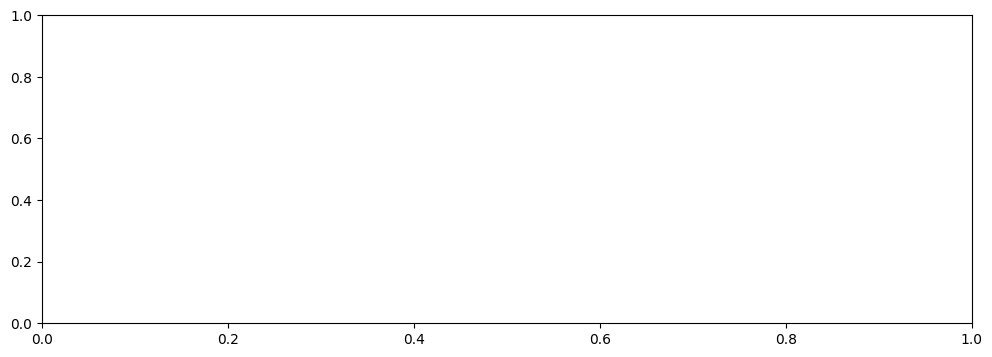

In [ ]:
plt.figure(figsize=(12,4))
plt.scatter(X_train, y_train)
plt.plot(X_train, 25 + 2 * X_train, color='green', linewidth=1)
plt.plot(X_train, fit_regression_line, color="red", linewidth=1)

(266,)

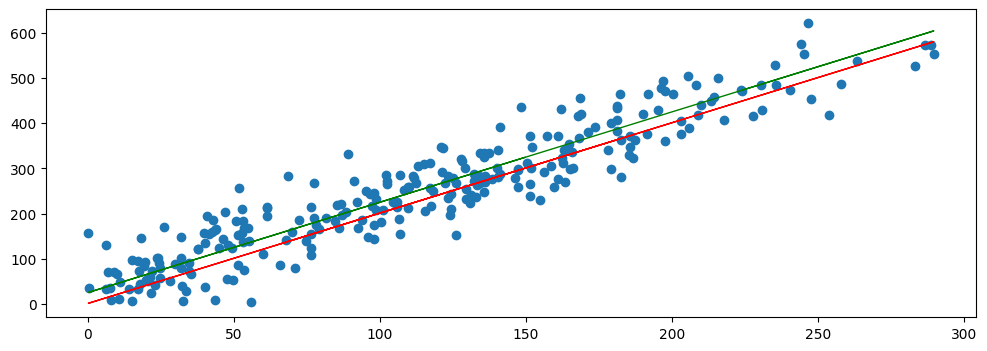

In [ ]:
from sklearn.model_selection import train_test_split

df_x = df["x"]
df_y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=.3, random_state=42)

true_slope, true_intercept = 2, 1
y_true = true_slope * X_train + true_intercept

plt.figure(figsize=(12,4))
plt.scatter(X_train, y_train)
plt.plot(x, 25 + 2 * x, color='green', linewidth=1)
plt.plot(X_train, y_true, color="red", linewidth=1)

X_train.shape